# ML (in Python) with sklearn
This document just runs through different usecases of python libraries one may use to implement machine learning algorithms

## Part 1: Reading Data in Pandas

In [349]:
from google.colab import files
uploaded = files.upload()

Saving Auto.csv to Auto (4).csv


In [350]:
import pandas as pd
import numpy as np
import io

# State the Pandas Version and load csv
print("Pandas Version: ", pd.__version__)
df = pd.read_csv(io.StringIO(uploaded['Auto.csv'].decode('utf-8')))
print("Dimension of Dataframe: ", df.shape)
df.head()

Pandas Version:  1.3.5
Dimension of Dataframe:  (392, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70.0,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70.0,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70.0,1,amc rebel sst
4,17.0,8,302.0,140,3449,NaN,70.0,1,ford torino


## Part 2: Data Exploration
A brief look into the data using describe()

In [351]:
# Describing the weight column, 
#   which has an average of 2977.58~,
#   and a range from 1613 to 5140
df['weight'].describe()

count     392.000000
mean     2977.584184
std       849.402560
min      1613.000000
25%      2225.250000
50%      2803.500000
75%      3614.750000
max      5140.000000
Name: weight, dtype: float64

In [352]:
# Describing the miles per gallon column, 
#   which has an average of 23.45~,
#   and a range from 9 to 46.6
df['mpg'].describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [353]:
# Describing the year column, 
#   which has an average of 76.01~,
#   and a range from 70 to 82
df['year'].describe()

count    390.000000
mean      76.010256
std        3.668093
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: year, dtype: float64

## What Are the Data Types?
We must verify the data is stored as needed and categorical data is categorical

In [354]:
# Look at the data again and see what might be categorical
print(df.dtypes)
df.head()

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70.0,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70.0,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70.0,1,amc rebel sst
4,17.0,8,302.0,140,3449,NaN,70.0,1,ford torino


The cylinder and origin attributes appear to be selected from a range so we will change them to categorical data

In [355]:
df['cylinders'].astype('category').cat.codes

0      4
1      4
2      4
3      4
4      4
      ..
387    1
388    1
389    1
390    1
391    1
Length: 392, dtype: int8

In [356]:
# Convert (Using cat.codes for cylinders to decrease the int size)
df['cylinders'] = df['cylinders'].astype('category').cat.codes
df['origin'] = df['origin'].astype('category')

In [357]:
# Verify
print(df.dtypes)
df.head()

mpg              float64
cylinders           int8
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,4,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,4,350.0,165,3693,11.5,70.0,1,buick skylark 320
2,18.0,4,318.0,150,3436,11.0,70.0,1,plymouth satellite
3,16.0,4,304.0,150,3433,12.0,70.0,1,amc rebel sst
4,17.0,4,302.0,140,3449,NaN,70.0,1,ford torino


## Dealing With NAs

In [358]:
# Check for NAs
print(df.isnull().sum())
# acceleration and year have NAs! Purge!
df = df.dropna()
print('\nDimensions of Dataframe: ', df.shape)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    1
year            2
origin          0
name            0
dtype: int64

Dimensions of Dataframe:  (389, 9)


## Create Target

In [359]:
mpgmean = df['mpg'].mean()
mpg_new = np.where(df['mpg']>mpgmean, 1, 0)
new_df = df.assign(mpg_high=mpg_new)
new_df.drop('mpg', axis=1, inplace=True)
new_df.drop('name', axis=1, inplace=True)
new_df.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_high
0,4,307.0,130,3504,12.0,70.0,1,0
1,4,350.0,165,3693,11.5,70.0,1,0
2,4,318.0,150,3436,11.0,70.0,1,0
3,4,304.0,150,3433,12.0,70.0,1,0
6,4,454.0,220,4354,9.0,70.0,1,0


## Graphical Analysis!

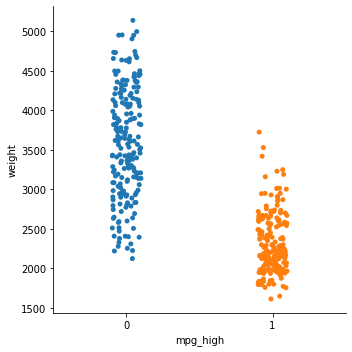

In [360]:
import seaborn as sb
sb.catplot(x='mpg_high', y='weight', data=new_df)

As opposed to just a catplot, which would tell as that the data is simply split between class 0 and 1, I displayed the data in relation to weight. We of course learn from thsi graph that mpg_high is a well distributed binary category, but we also see it has a clear relation to other attributes (in this case, weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


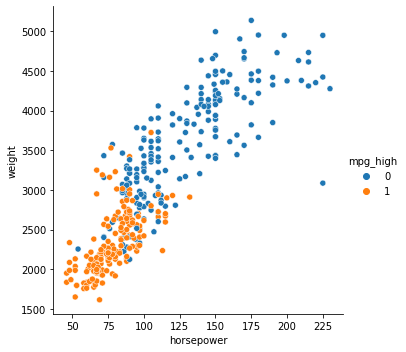

In [361]:
sb.relplot('horsepower', y='weight', data=new_df, hue='mpg_high')

To further study the relation between mpg category and other attributes, above we see that there is also a relationship between all 3 attributes weight, horsepower, and mpg_high. that indicates that weight and horsepower would be good predictors of mpg_high

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


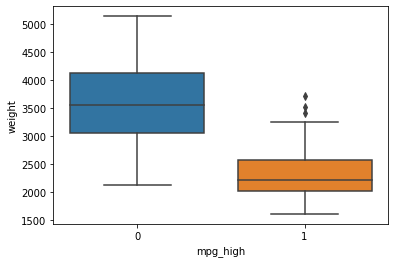

In [362]:
sb.boxplot('mpg_high', y='weight', data=new_df)

Another visualization of mpg_high (as a boxplot) tells us the data is well sperated. The mean of low mpg car's weights is far seperated from the mean of high mpg car's weights. In the case where high mpg cars have a high weight, we can see that those are outliers.

## Train/Test Split
Now we move to train models on the data by dividing the data on an 80/20 split using sklearn

In [363]:
from sklearn.model_selection import train_test_split

X = new_df.loc[:, new_df.columns!='mpg_high']
Y = new_df.mpg_high

print(X.shape)
print(Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

print('train size:', X_train.shape)
print('test size:', X_test.shape)

if X.shape[0] != Y.shape[0]:
  print("X and y rows are mismatched, check dataset again")

(389, 7)
(389,)
train size: (311, 7)
test size: (78, 7)


## Logistic Regression
Now we can train the data on a variety of models to find our target mpg_high

In [390]:
from sklearn.utils.multiclass import check_classification_targets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf = LogisticRegression()
clf.fit(X_train, Y_train)
print(clf.score(X_train, Y_train))

pred = clf.predict(X_test)

print(classification_report(Y_test, pred))

# Ignoring Warnings because we live Dangerously!

0.9067524115755627
              precision    recall  f1-score   support

           0       0.98      0.80      0.88        50
           1       0.73      0.96      0.83        28

    accuracy                           0.86        78
   macro avg       0.85      0.88      0.85        78
weighted avg       0.89      0.86      0.86        78



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Decision Tree
Logistic Regression got a solid .86 accuracy, what about a tree?

In [418]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(random_state=1234)
clf_tree = clf_tree.fit(X_train, Y_train)

pred = clf_tree = clf_tree.predict(X_test)

print(classification_report(Y_test.values, pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        50
           1       0.87      0.93      0.90        28

    accuracy                           0.92        78
   macro avg       0.91      0.92      0.92        78
weighted avg       0.93      0.92      0.92        78



.97 Accuracy! A Minor Improvement!

## Neural Network

In [431]:
_from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

We just scaled the data, and now can train a neural network. I'm just going to use an arbitrary topology

In [432]:
from sklearn.neural_network import MLPClassifier

clf_net = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5,1), max_iter=500
                        , random_state=1234)
clf_net.fit(X_train_scaled, Y_train)

MLPClassifier(hidden_layer_sizes=(5, 1), max_iter=500, random_state=1234,
              solver='lbfgs')

In [436]:
pred_1=clf_net.predict(X_test_scaled)
print(classification_report(Y_test,pred_1,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87        50
           1       0.75      0.86      0.80        28

    accuracy                           0.85        78
   macro avg       0.83      0.85      0.84        78
weighted avg       0.85      0.85      0.85        78



In [467]:
clf_net_2 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(3,3), max_iter=1500
                        , random_state=1234)
clf_net_2.fit(X_train_scaled, Y_train)

MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=1500, random_state=1234,
              solver='lbfgs')

In [468]:
pred_2 = clf_net_2.predict(X_test_scaled)
print(classification_report(Y_test,pred_2,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        50
           1       0.86      0.89      0.88        28

    accuracy                           0.91        78
   macro avg       0.90      0.91      0.90        78
weighted avg       0.91      0.91      0.91        78



The second model was better simply because it was simpler. The model size of the first neural network was more complicated, which could have lead to a bit of an over fit in the neural network. The distribution between 2 less complicated hidden layers also was able to model a more complex relationship

## Analysis
The best algorithm was a Decision Tree but only by a small margin over the neural networks.

Looking at the specifics of accuracy, recall, and precision:
- The best accuracy was the decision tree, while logisitic regression was the worst.
- Once again recall was better in decision trees with logistic regression being the worse, but was very similar to our best neural network
- Precision was actually quite good in all of the algorithms but was .98 in our logistic regression. Seems to suggest there was a general issue of the model's correlation to the data. It was very good at predicting one type of result, but it over predicted it.

I think the decision tree worked the best because the data set was so small, and the relationship was somewhat simple for some given parameters. Based on our graphical analysis the target had a straight forward relationship to weight and horsepower. Thus Decision trees did okay, even just a bit better than my neural networks.

Using these libraries, I feel python was much more straight forward to use. I'm saying this from the perspective of someone who wants a general purpose solution for my programming language. The statistical function of R was well replicated in Python, while python is also capable of easily doing other functions. Sure it wasn't as simple to work with the data as it is in R, but the end result is the same.

I've also used Jupyter in the past though, so I have a pre-exisiting preference.